# Model training and evaluation

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
import graphviz
from sklearn import metrics

In [2]:
    # metrics for each class + weighted average (- bad impact)
    # micro f1 = accuracy
    def print_metrics():
        sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
        print('accuracy: ',metrics.accuracy_score(y_test, cls.predict(X_test)))
        print()
        print(metrics.classification_report(y_test, cls.predict(X_test)))
        print('macro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='macro'))
        print('micro precision: ',metrics.precision_score(y_test, cls.predict(X_test), average='micro'))
        print()
        print('micro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='micro'))
        print('macro recall: ',metrics.recall_score(y_test, cls.predict(X_test), average='macro'))
        print()
        print('micro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='micro'))
        print('macro f1: ',metrics.f1_score(y_test, cls.predict(X_test), average='macro'))
        plt.show()

In [3]:
def x(classifier):
    new = classifier([[0,1], [1,22]])
    print(new.head())

In [4]:
x(pd.DataFrame)

   0   1
0  0   1
1  1  22


In [5]:
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [50, 20]

In [6]:
# df = pd.read_csv('data/static_02_no_categorical.csv', index_col=0)
# df = pd.read_csv('data/dynamic_01.csv', index_col=0)

# Compare these datasets:
# df = pd.read_csv('data/normalized/original.csv', index_col=0)
# df = pd.read_csv('data/normalized/boxcox.csv', index_col=0)
df = pd.read_csv('data/quantiletransformer.csv', index_col=0)
# df = pd.read_csv('data/normalized/quantiletransformer.csv', index_col=0)

In [229]:
df = df[(df['ratio_running_duration'] >= 25) & (df['ratio_running_duration'] < 50)]

In [7]:
df = df[(df['ratio_running_duration_original'] >= 25) & (df['ratio_running_duration_original'] < 50)]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 30686
Data columns (total 43 columns):
average_pledge                           7789 non-null float64
backers_count                            7789 non-null float64
category_position                        7789 non-null float64
days_duration                            7789 non-null float64
days_preparation                         7789 non-null float64
days_remaining                           7789 non-null float64
days_running                             7789 non-null float64
db_duration                              7789 non-null float64
goal                                     7789 non-null float64
pledged                                  7789 non-null float64
ratio_pledged_goal                       7789 non-null float64
ratio_running_duration                   7789 non-null float64
staff_pick                               7789 non-null float64
usd_goal                                 7789 non-null float64
usd_pledge

In [9]:
df.drop('ratio_running_duration_original', axis=1, inplace=True)

In [10]:
df.sample(5)

,average_pledge,backers_count,category_position,days_duration,days_preparation,days_remaining,days_running,db_duration,goal,pledged,...,launch_dayofweek,launch_hour,image_count,video_kickstarter_count,video_youtube_count,video_count,audio_count,other_embeded_count,blurb_words,class
15989,-0.053396,0.690243,-0.783707,1.000000,0.065014,0.366418,0.255801,1.000000,-0.333600,0.491723,...,0.603678,-1.187170,0.676782,0.0,0.0,0.0,0.0,0.0,0.348510,4
5140,-0.244329,-0.582888,0.831178,0.000000,0.714073,0.056828,-0.236907,0.000000,0.891063,-0.575992,...,0.603678,0.092617,-0.640716,0.0,0.0,0.0,0.0,0.0,0.534018,1
13810,-0.615538,-0.424953,-0.322729,1.765015,-0.720714,1.096048,0.106780,1.764524,0.903881,-0.543147,...,0.000000,0.661423,-0.640716,0.0,0.0,0.0,0.0,0.0,0.348510,1
977,-0.759142,-0.424953,0.662188,1.718966,0.421256,0.635776,0.604824,1.718516,0.611147,-0.654158,...,0.851879,-1.113822,-0.640716,0.0,0.0,0.0,0.0,0.0,-0.979622,1
14199,0.831498,0.259117,-0.150466,0.000000,0.939572,0.111967,-0.302314,0.000000,0.261224,0.426548,...,0.000000,0.092617,0.669350,0.0,0.0,0.0,0.0,0.0,-0.465982,2


In [11]:
# split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.30, random_state=16)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5452 entries, 1310 to 27010
Data columns (total 41 columns):
average_pledge                           5452 non-null float64
backers_count                            5452 non-null float64
category_position                        5452 non-null float64
days_duration                            5452 non-null float64
days_preparation                         5452 non-null float64
days_remaining                           5452 non-null float64
days_running                             5452 non-null float64
db_duration                              5452 non-null float64
goal                                     5452 non-null float64
pledged                                  5452 non-null float64
ratio_pledged_goal                       5452 non-null float64
ratio_running_duration                   5452 non-null float64
staff_pick                               5452 non-null float64
usd_goal                                 5452 non-null float64
usd_ple

In [13]:
X_train.head()

,average_pledge,backers_count,category_position,days_duration,days_preparation,days_remaining,days_running,db_duration,goal,pledged,...,launch_day,launch_dayofweek,launch_hour,image_count,video_kickstarter_count,video_youtube_count,video_count,audio_count,other_embeded_count,blurb_words
1310,0.198546,1.080571,-1.150512,0.0,1.200105,0.000000,-0.174249,0.0,0.688365,0.941918,...,0.294963,-0.937589,-0.794998,0.153589,0.0,0.0,0.0,0.0,0.024522,1.135186
24459,-0.068725,0.512710,1.125783,0.0,0.000000,0.165549,-0.370835,0.0,1.101164,0.787973,...,-0.657995,0.000000,-0.625618,-0.117514,0.0,0.0,0.0,0.0,0.000000,-1.512520
12398,-0.434853,0.455337,-0.783707,0.0,0.600687,0.268488,-0.519152,0.0,-1.140389,0.108882,...,-0.570842,0.000000,-1.113822,0.473484,0.0,0.0,0.0,0.0,0.000000,0.348510
10862,-0.669686,0.000000,-0.783707,0.0,-0.414653,0.268488,-0.519152,0.0,-0.756679,-0.335686,...,-0.570842,-0.937589,0.469510,0.153589,0.0,0.0,0.0,0.0,0.000000,-0.606016
18955,-1.541726,-0.871887,1.056618,0.0,-0.539431,0.217689,-0.442923,0.0,-0.176598,-1.135288,...,-0.570842,-0.396322,0.185907,-0.640716,0.0,0.0,0.0,0.0,0.000000,0.170493


dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train[['ratio_pledged_goal']].columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("kickstarter2_boxcox")

%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

cls = RandomForestClassifier()
scores = cross_val_score(cls, df.drop('class', axis=1), df['class'], cv=LeaveOneOut())
print(scores)
print(scores.mean())

%%time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

cls = LogisticRegression(multi_class='multinomial', solver='newton-cg')
scores = cross_val_score(cls, df.drop('class', axis=1), df['class'], cv=10)
print(scores)
print(scores.mean())

## Classifiers

accuracy:  0.643988018828

             precision    recall  f1-score   support

          1       0.86      0.88      0.87       946
          2       0.26      0.25      0.26       287
          3       0.51      0.37      0.43       545
          4       0.57      0.70      0.63       559

avg / total       0.64      0.64      0.64      2337

macro precision:  0.550474194749
micro precision:  0.643988018828

micro recall:  0.643988018828
macro recall:  0.553227166839

micro f1:  0.643988018828
macro f1:  0.547626260424


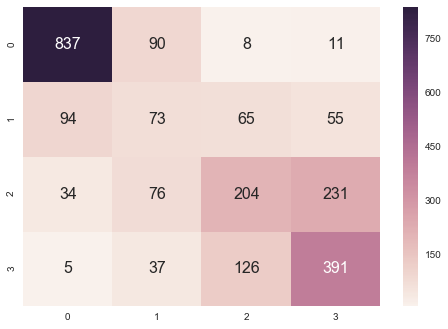

In [14]:
# 0.527623126338 - original data
# 0.529336188437 - used Box-cox
# 0.529336188437 - used Robust Scaler followed by Box-cox
# 0.645824411135 - used Quantile Transformer
from sklearn.naive_bayes import BernoulliNB
cls = BernoulliNB()
cls = cls.fit(X_train, y_train)
print_metrics()

1.0
0.754813863928


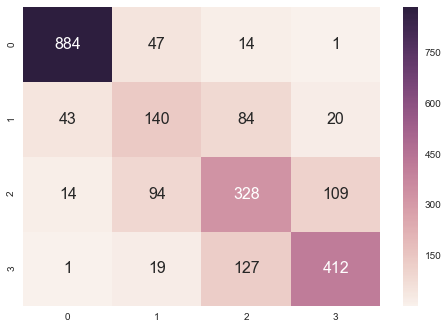

In [16]:
# 0.737473233405
# 0.734047109208
# 0.741327623126
# 0.746466809422
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

#dot_data = tree.export_graphviz(cls, out_file=None, feature_names=X_train.columns, class_names=['1','2','3','4'],filled=True, rounded=True, special_characters=True) 
#graph = graphviz.Source(dot_data)
#graph.render("kickstarter2_robustScaler_box-cox")

1.0
0.667950363714


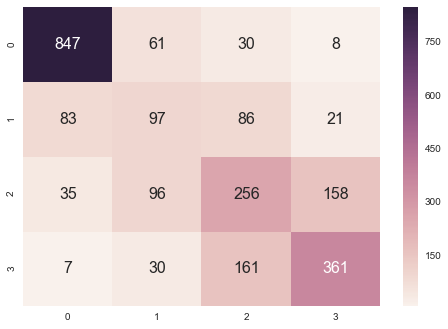

In [17]:
# 0.613704496788
# 0.652248394004
# 0.659528907923
# 0.659957173448
from sklearn.tree import ExtraTreeClassifier
cls = ExtraTreeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

1.0
0.776636713736


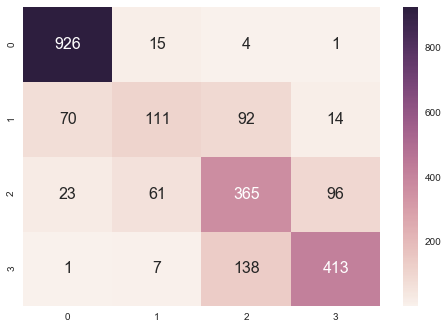

In [18]:
# 0.732334047109
# 0.764882226981
# 0.764882226981
# 0.756745182013
from sklearn.ensemble import ExtraTreesClassifier
cls = ExtraTreesClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.677366104182
0.675224646983


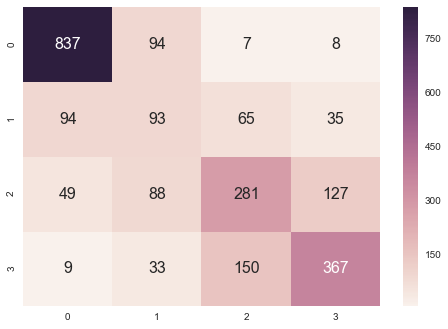

In [19]:
# 0.351605995717
# 0.677944325482
# 0.677944325482
# 0.62312633833
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.771460014674
0.658536585366


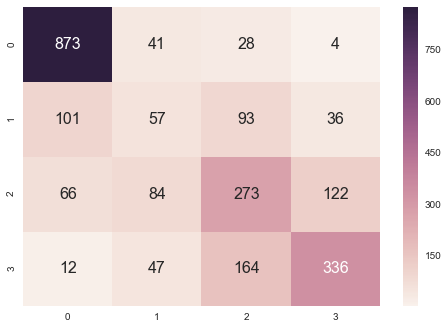

In [20]:
# 0.769164882227
# 0.603426124197
# 0.563169164882
# 0.564025695931
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.796221570066
0.801026957638


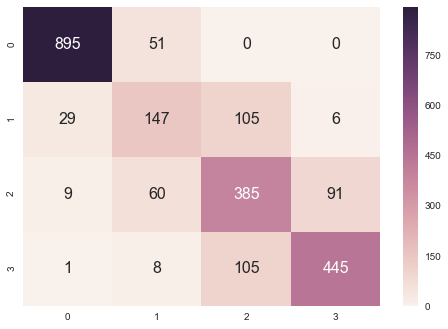

In [21]:
# 0.591006423983
# 0.785438972163
# 0.796145610278
# 0.73704496788
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
cls = LinearDiscriminantAnalysis()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.805942773294
0.792041078306


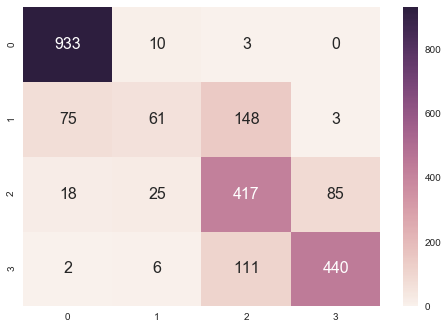

In [22]:
# 0.64625267666
# 0.752890792291
# 0.790149892934
# 0.777301927195
from sklearn.svm import LinearSVC
cls = LinearSVC(multi_class='crammer_singer')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.813279530448
0.802738553701


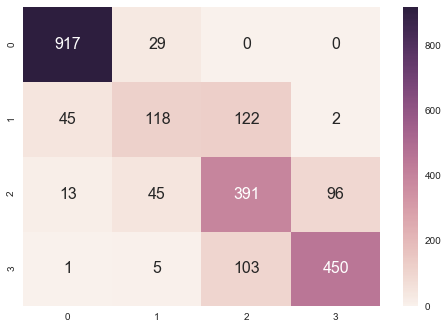

In [23]:
# 0.813276231263
# 0.804710920771
# 0.803426124197
# 0.778586723769
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(multi_class='multinomial', solver='newton-cg')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.812362435803
0.803594351733


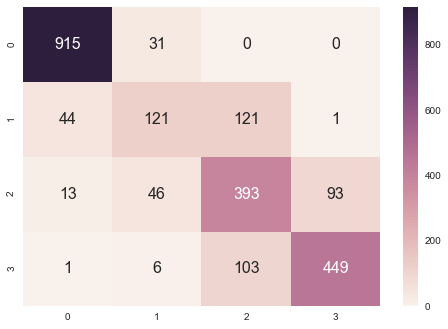

In [24]:
# 0.791862955032
# 0.807708779443
# 0.808565310493
# 0.777301927195
from sklearn.linear_model import LogisticRegressionCV
cls = LogisticRegressionCV(multi_class='multinomial')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.851614086574
0.802738553701


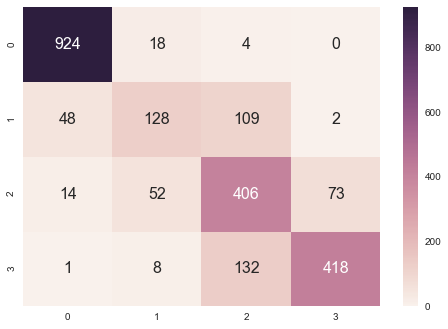

In [25]:
# 0.716916488223
# 0.779443254818
# 0.797858672377
# 0.772162740899
from sklearn.neural_network import MLPClassifier
cls = MLPClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.599596478357
0.591784338896


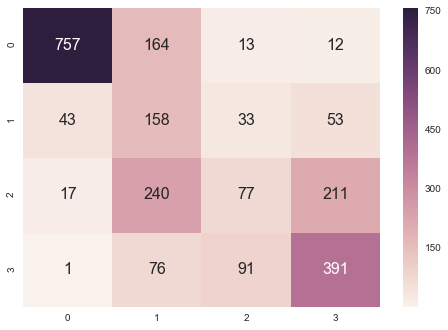

In [26]:
# 0.305781584582
# 0.277944325482
# 0.364025695931
# 0.535760171306
from sklearn.neighbors import NearestCentroid
cls = NearestCentroid()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.746515040352
0.701754385965


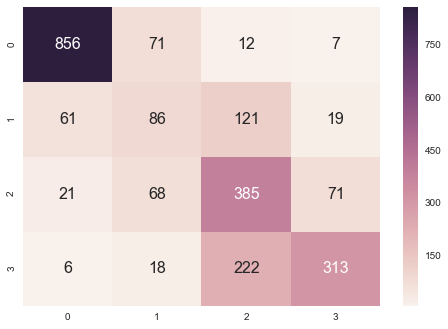

In [27]:
# 0.665524625268
# 0.683940042827
# 0.719914346895
# 0.670663811563
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
cls = QuadraticDiscriminantAnalysis()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.403338224505
0.404792468977


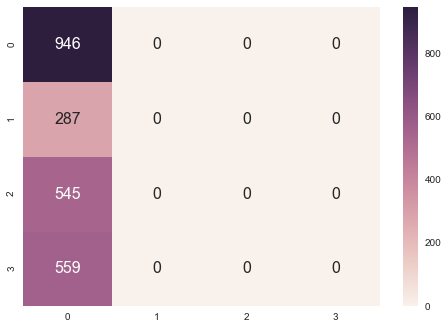

In [28]:
# -
# 0.408565310493
# 0.408565310493
# 0.408565310493
from sklearn.neighbors import RadiusNeighborsClassifier
cls = RadiusNeighborsClassifier(radius=50)
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.990462215701
0.792896876337


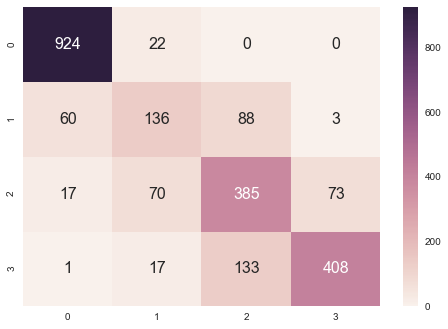

In [29]:
# 0.798715203426
# 0.791434689507
# 0.781584582441
# 0.786295503212
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.729090242113
0.732563115105


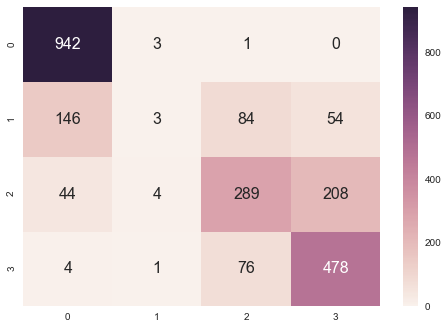

In [30]:
# 0.577301927195
# 0.729336188437
# 0.737473233405
# 0.730620985011
from sklearn.linear_model import RidgeClassifier
cls = RidgeClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.729090242113
0.732563115105


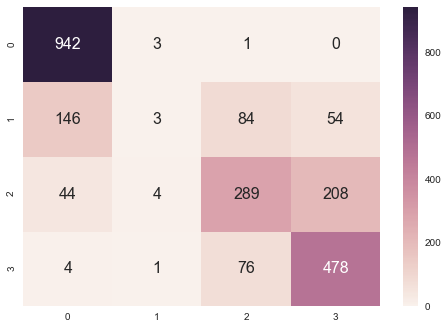

In [31]:
# 0.572591006424
# 0.729336188437
# 0.737473233405
# 0.730620985011
from sklearn.linear_model import RidgeClassifierCV
cls = RidgeClassifierCV()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

### 1v1

0.97487160675
0.756097560976


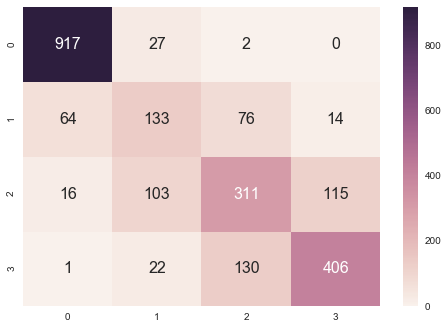

In [32]:
# 0.408565310493
# 0.61670235546
# 0.72591006424
# 0.641541755889
from sklearn.svm import NuSVC
cls = NuSVC(nu=0.1)
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.813096111519
0.799743260591


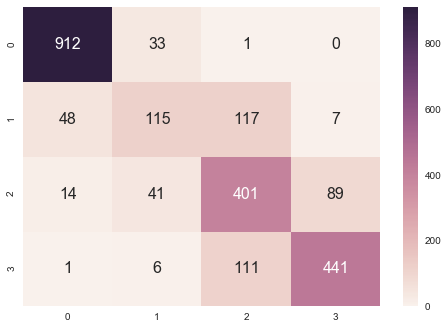

In [33]:
# 0.408565310493
# 0.601284796574
# 0.733618843683
# 0.65182012848
from sklearn.svm import SVC
cls = SVC()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.956896551724
0.717158750535


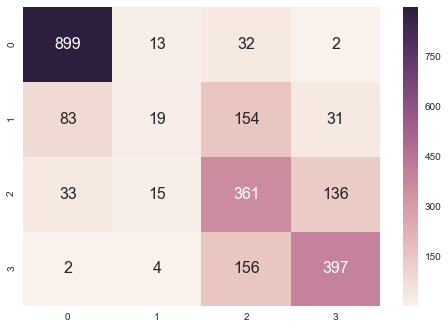

In [34]:
# 0.41755888651
# 0.564025695931
# 0.642826552463
# 0.528907922912
# WARNING SLOW !!!
from sklearn.gaussian_process import GaussianProcessClassifier
cls = GaussianProcessClassifier(multi_class='one_vs_one')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

### 1vAll

0.882611885547
0.806161745828


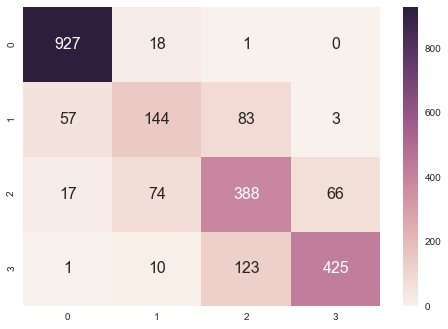

In [35]:
# 0.813704496788
# 0.815417558887
# 0.815417558887
# 0.814989293362
from sklearn.ensemble import GradientBoostingClassifier
cls = GradientBoostingClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.96221570066
0.715875053487


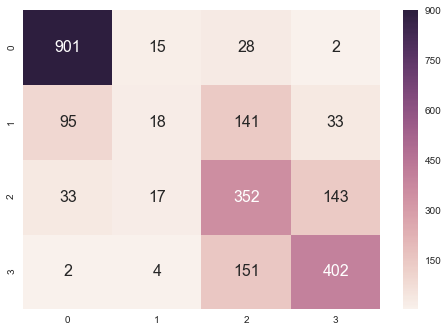

In [36]:
# 0.243683083512
# 0.476659528908
# 0.638115631692
# 0.510064239829
# WARNING SLOW !!!
from sklearn.gaussian_process import GaussianProcessClassifier
cls = GaussianProcessClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.777329420396
0.774497218656


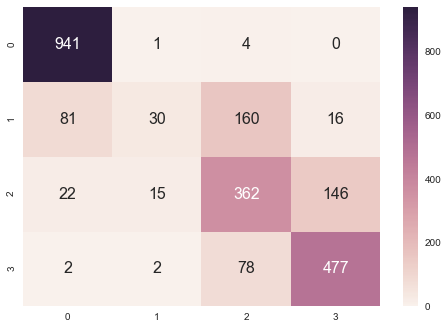

In [37]:
# 0.666809421842
# 0.647537473233
# 0.779014989293
# 0.727194860814
from sklearn.svm import LinearSVC
cls = LinearSVC(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.778613352898
0.777920410783


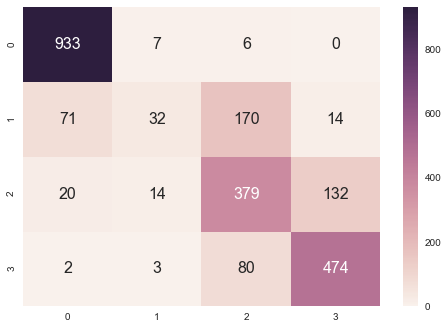

In [38]:
# 0.770021413276
# 0.78244111349
# 0.777730192719
# 0.763597430407
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

0.750733675715
0.75566966196


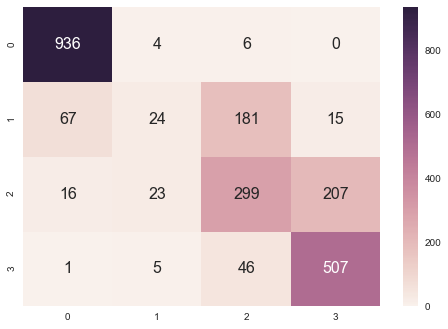

In [39]:
# 0.777730192719
# 0.758029978587
# 0.777730192719
# 0.761884368308
from sklearn.linear_model import LogisticRegressionCV
cls = LogisticRegressionCV(multi_class='ovr')
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.732391782832
0.737270004279


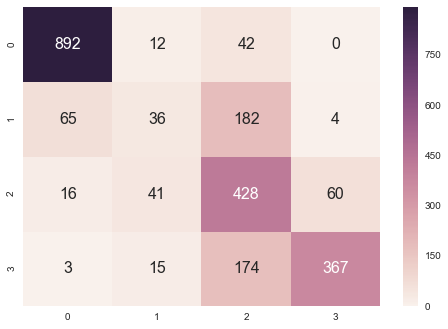

In [40]:
# 0.555032119914
# 0.761027837259
# 0.58244111349
# 0.700642398287
from sklearn.linear_model import SGDClassifier
cls = SGDClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.709831254585
0.707317073171


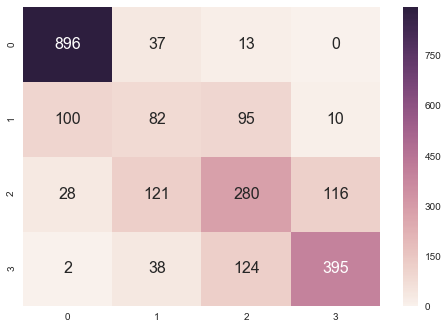

In [41]:
# 0.606852248394
# 0.577301927195
# 0.573447537473
# 0.629122055675
from sklearn.linear_model import Perceptron
cls = Perceptron()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))

C:\Users\Patrik\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.660674981658
0.657252888318


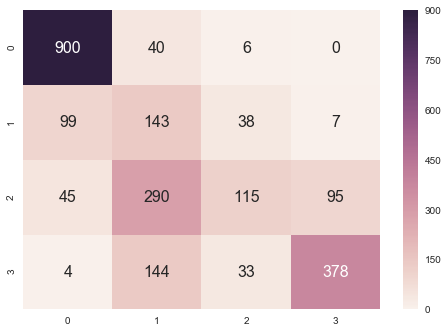

In [42]:
# 0.57687366167
# 0.647537473233
# 0.657815845824
# 0.655674518201
from sklearn.linear_model import PassiveAggressiveClassifier
cls = PassiveAggressiveClassifier()
cls = cls.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, cls.predict(X_test)), annot=True, fmt='g', annot_kws={"size": 16})
print(cls.score(X_train, y_train))
print(cls.score(X_test, y_test))